<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')
#pio.templates.default = "jedha"
#pio.renderers.default = "iframe_connected" # to be replaced by "iframe" if working on JULIE

# Importer de données

In [138]:
url = "https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/Walmart_Store_sales.csv"
df0 = pd.read_csv(url)
df0.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470


In [139]:
df0.shape

(150, 8)

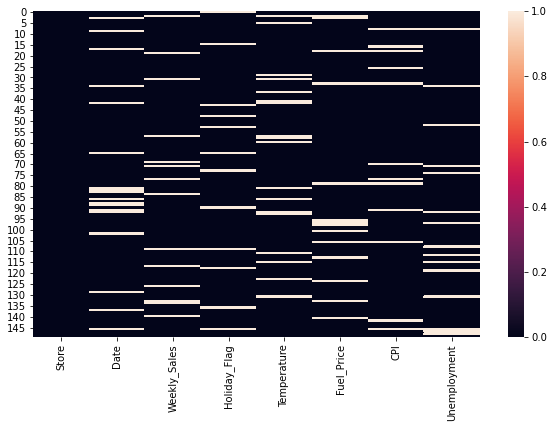

In [140]:
plt.figure(figsize=(10,6))
sns.heatmap(df0.isnull())
plt.show()

In [141]:
df0["Holiday_Flag"] = df0["Holiday_Flag"].fillna(0)
df0["Holiday_Flag"].value_counts()

0.0    139
1.0     11
Name: Holiday_Flag, dtype: int64

In [142]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  150 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [143]:
df0["Weekly_Sales"].mean()

1249535.8279411772

In [144]:
df0["Weekly_Sales"]=df0["Weekly_Sales"].fillna(df0["Weekly_Sales"].mean())

In [145]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  150 non-null    float64
 3   Holiday_Flag  150 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


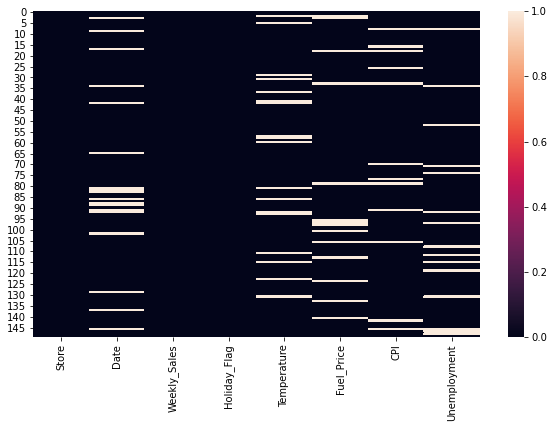

In [146]:
plt.figure(figsize=(10,6))
sns.heatmap(df0.isnull())
plt.show()

In [147]:
df0.shape

(150, 8)

In [148]:
df0["Store"].value_counts()

3.0     15
1.0     11
18.0    10
19.0     9
5.0      9
14.0     9
13.0     9
7.0      8
17.0     8
2.0      8
8.0      8
6.0      7
20.0     7
4.0      7
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

* Drop outliers values.

In [149]:
cols1 = ["Temperature","Fuel_Price","CPI","Unemployment"]
for k in df0[cols1]:
    factor = 3 #The optimal value for this parameter can be later determined though the cross-validation 
    upper_limit = df0[k].mean() + df0[k].std()*factor 
    lower_limit = df0[k].mean() - df0[k].std()*factor
    df0 = df0[(df0[k] < upper_limit) & (df0[k] > lower_limit)]

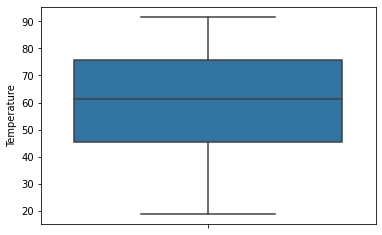

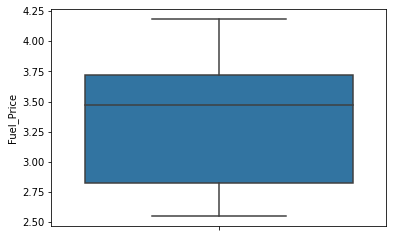

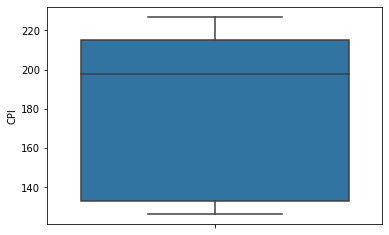

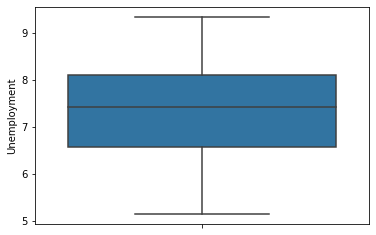

In [226]:
for k in cols1:
    plt.figure()
    sns.boxplot(y=df0[k])
    plt.show()

In [151]:
import datetime

In [152]:
df0['Date'] = pd.to_datetime(df0['Date'])
df0['Day'] = df0['Date'].dt.day
df0['DayOfWeek'] = df0['Date'].dt.day_name()
df0['Weekday'] = df0['Date'].dt.dayofweek # The day of the week with Monday=0, Sunday=6.
df0['Month'] = df0['Date'].dt.month
df0['Month_name'] = df0['Date'].dt.month_name()
df0['Year'] = df0['Date'].dt.year
df0.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,DayOfWeek,Weekday,Month,Month_name,Year
0,6.0,2011-02-18,1572117.54,0.0,59.61,3.045,214.777523,6.858,18.0,Friday,4.0,2.0,February,2011.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,25.0,Friday,4.0,3.0,March,2011.0
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,28.0,Friday,4.0,5.0,May,2010.0
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,6.0,Sunday,6.0,3.0,March,2011.0
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2.0,Friday,4.0,3.0,March,2012.0


In [153]:
useless_cols = ["Date", "Day", "DayOfWeek"]
df1 = df0.drop(useless_cols, axis=1)
df1.head(5)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Month_name,Year
0,6.0,1572117.54,0.0,59.61,3.045,214.777523,6.858,4.0,2.0,February,2011.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,4.0,3.0,March,2011.0
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,4.0,5.0,May,2010.0
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,6.0,3.0,March,2011.0
7,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,4.0,3.0,March,2012.0


In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         98 non-null     float64
 1   Weekly_Sales  98 non-null     float64
 2   Holiday_Flag  98 non-null     float64
 3   Temperature   98 non-null     float64
 4   Fuel_Price    98 non-null     float64
 5   CPI           98 non-null     float64
 6   Unemployment  98 non-null     float64
 7   Weekday       88 non-null     float64
 8   Month         88 non-null     float64
 9   Month_name    88 non-null     object 
 10  Year          88 non-null     float64
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


# L'analyse exploratoire de données

In [155]:
df_viz = df0.copy()
df_viz.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,DayOfWeek,Weekday,Month,Month_name,Year
0,6.0,2011-02-18,1572117.54,0.0,59.61,3.045,214.777523,6.858,18.0,Friday,4.0,2.0,February,2011.0


In [156]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 149
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         98 non-null     float64       
 1   Date          88 non-null     datetime64[ns]
 2   Weekly_Sales  98 non-null     float64       
 3   Holiday_Flag  98 non-null     float64       
 4   Temperature   98 non-null     float64       
 5   Fuel_Price    98 non-null     float64       
 6   CPI           98 non-null     float64       
 7   Unemployment  98 non-null     float64       
 8   Day           88 non-null     float64       
 9   DayOfWeek     88 non-null     object        
 10  Weekday       88 non-null     float64       
 11  Month         88 non-null     float64       
 12  Month_name    88 non-null     object        
 13  Year          88 non-null     float64       
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 11.5+ KB


In [157]:
df_viz["DayOfWeek"].count()

88

In [158]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [159]:
sale_count = df_viz.groupby(["Month_name", "Day", "DayOfWeek"])["Date"].count()
sale_count = sale_count.reset_index()
sale_count = sale_count.rename(columns = {'Date':'sale_count'})
sale_count = sale_count.loc[(sale_count["sale_count"] != 0)]
sale_count.head(5)

,Month_name,Day,DayOfWeek,sale_count
0,April,5.0,Thursday,1
1,April,6.0,Tuesday,1
2,April,13.0,Friday,1
3,April,16.0,Friday,1
4,April,20.0,Friday,2


In [160]:
sale_count['DayOfWeek'] = pd.Categorical(sale_count['DayOfWeek'],
                                   categories=day_order,
                                   ordered=True)

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


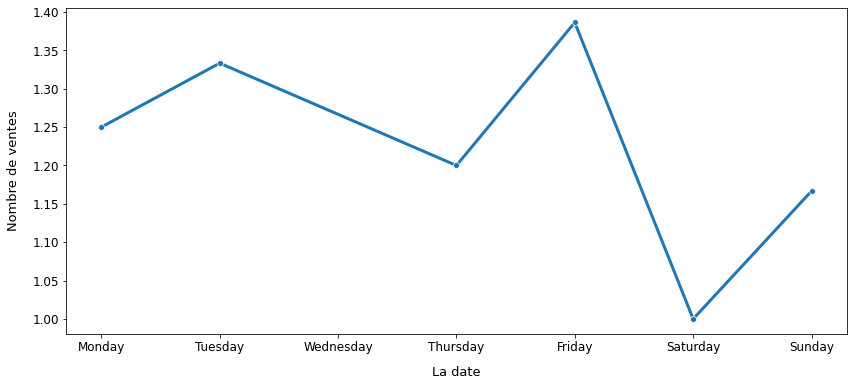

In [161]:
fig, ax = plt.subplots(figsize = (14,6))
sns.lineplot(data = sale_count, x = "DayOfWeek", y = "sale_count",
            marker="o", estimator="mean", ci= 0.5, palette = 'nipy_spectral', ax = ax, lw = 3)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("La date",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de ventes",labelpad = 12, fontsize = 13)
plt.show()

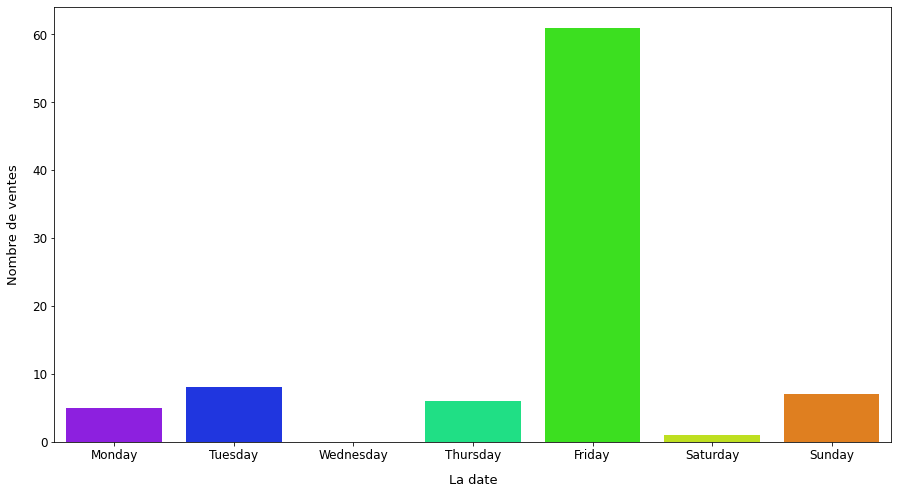

In [162]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_viz, x='DayOfWeek', order = day_order, palette='gist_rainbow_r')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("La date",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de ventes",labelpad = 12, fontsize = 13)
plt.show()

<AxesSubplot:ylabel='Weekly_Sales'>

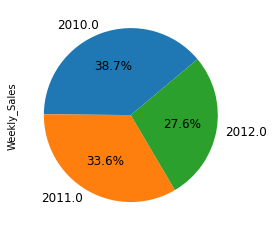

In [163]:
year_count = df_viz.groupby(["Year"])["Weekly_Sales"].sum()
year_count.plot.pie(autopct="%.1f%%", startangle=40, textprops={'fontsize': 12})

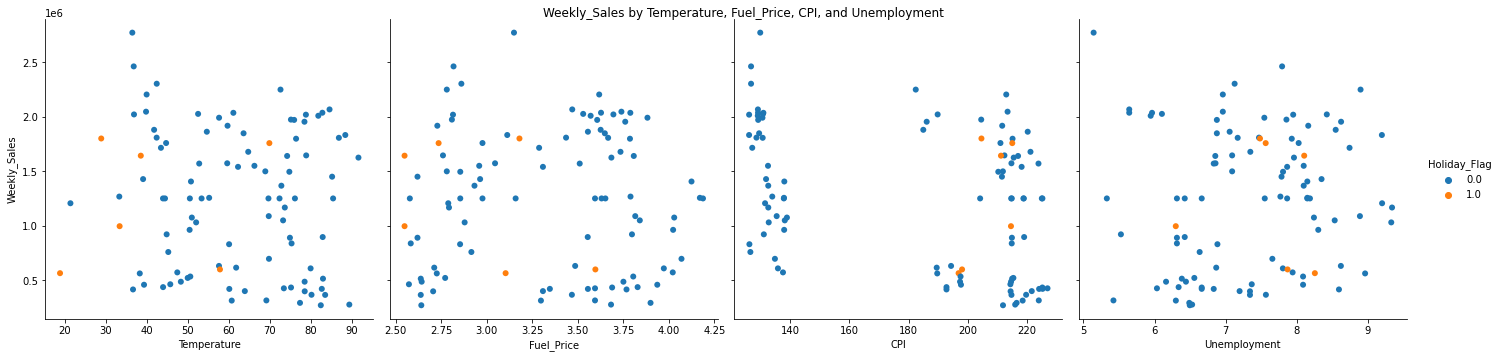

In [164]:
sns.pairplot(df_viz,
             hue='Holiday_Flag',
             x_vars=["Temperature", "Fuel_Price", "CPI", "Unemployment"],
             y_vars='Weekly_Sales',
             height=5,
             plot_kws={'alpha':1, 'linewidth':0}
            )
plt.suptitle("Weekly_Sales by Temperature, Fuel_Price, CPI, and Unemployment")
sns.despine();

In [165]:
df_viz["Month_name"].value_counts()

March        12
May           9
April         9
July          9
December      8
June          8
February      7
October       7
September     6
November      6
August        5
January       2
Name: Month_name, dtype: int64

In [166]:
#date formatters
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [167]:
month_order = ["January", "February", "March", "April", "May", "June", "July", 
               "August", "September", "October", "November", "December"]

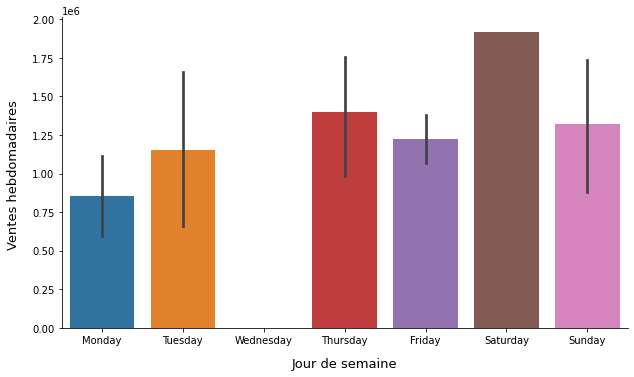

In [168]:
sns.catplot(data=df_viz, x = "DayOfWeek", y="Weekly_Sales", kind="bar", aspect=12/7, order = day_order)
plt.xlabel("Jour de semaine",labelpad = 12, fontsize = 13)
plt.ylabel("Ventes hebdomadaires ",labelpad = 12, fontsize = 13)
plt.show()

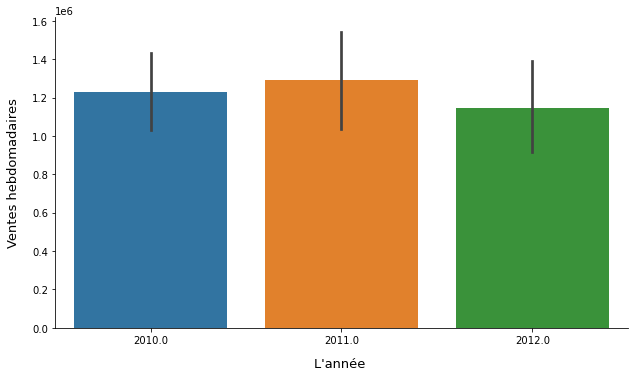

In [169]:
sns.catplot(data=df_viz, x = "Year", y="Weekly_Sales", kind="bar", aspect=12/7)
plt.xlabel("L'année ",labelpad = 12, fontsize = 13)
plt.ylabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
plt.show()

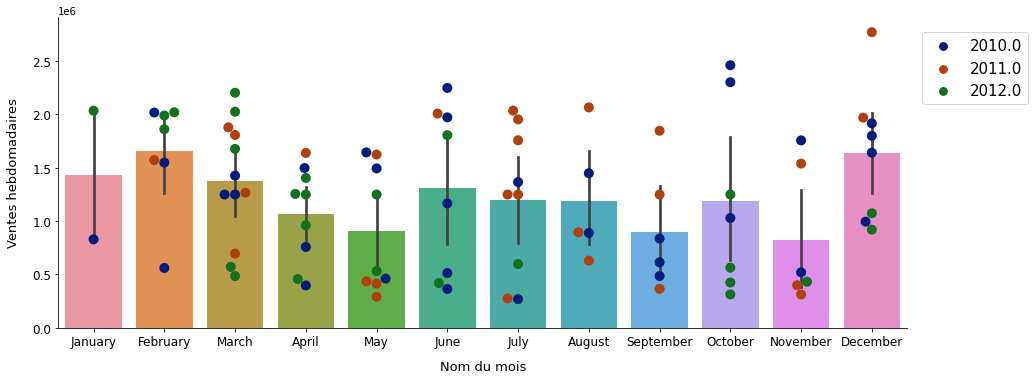

In [170]:
sns.catplot(data=df_viz, x="Month_name", y="Weekly_Sales", kind="bar", aspect=15/6, order = month_order)
sns.swarmplot(data= df_viz, y='Weekly_Sales', x = "Month_name", order = month_order, size = 10, hue = "Year", palette="dark")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Nom du mois",labelpad = 12, fontsize = 13)
plt.ylabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
plt.legend(bbox_to_anchor = (1,1), loc = 2, borderaxespad=1, fontsize= 15)
plt.show()

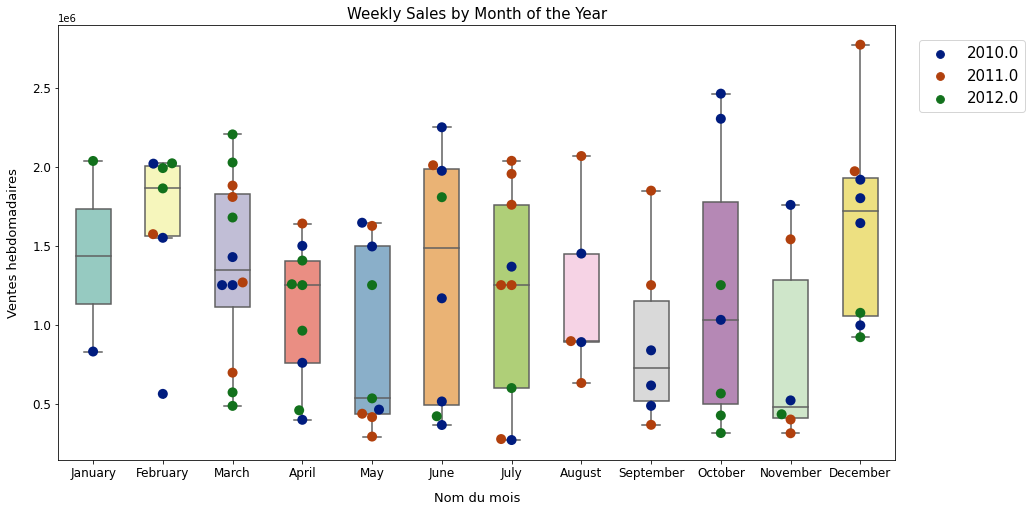

In [171]:
plt.figure(figsize=(15,8))
#fig.suptitle("Weekly Sales by Month of the Year", fontsize = 15)
sns.boxplot(data= df_viz, y='Weekly_Sales', x = "Month_name", order = month_order, width= 0.5, palette="Set3")
sns.swarmplot(data= df_viz, y='Weekly_Sales', x = "Month_name", order = month_order, size = 10, hue = "Year", palette="dark")
plt.title("Weekly Sales by Month of the Year", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Nom du mois",labelpad = 12, fontsize = 13)
plt.ylabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
plt.legend(bbox_to_anchor = (1.01,1), loc = 2, borderaxespad=1, fontsize= 15)
plt.show()

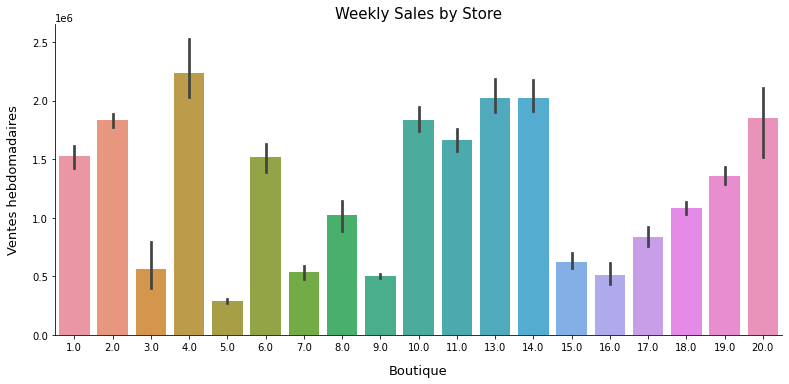

In [172]:
sns.catplot(x="Store", y="Weekly_Sales", kind="bar", data=df_viz, aspect=15/7)
plt.title("Weekly Sales by Store", fontsize = 15)
plt.xlabel("Boutique",labelpad = 12, fontsize = 13)
plt.ylabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
plt.show()

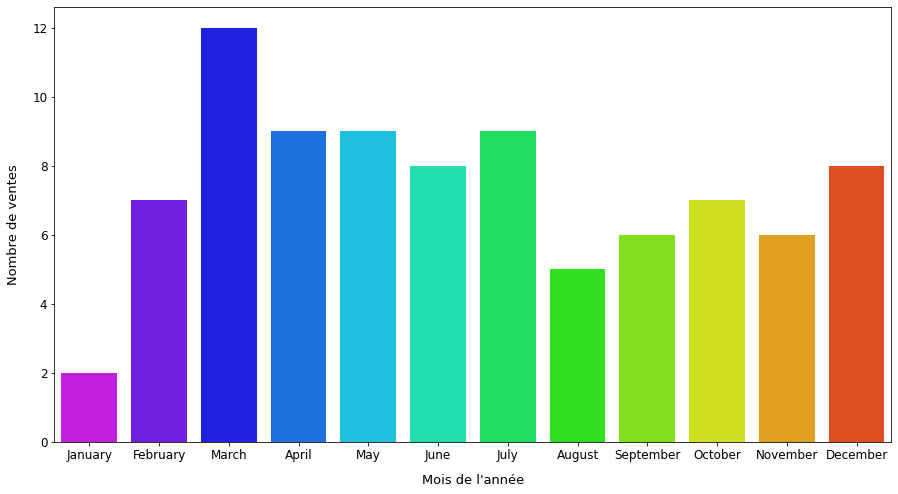

In [173]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_viz, x='Month_name', order = month_order, palette='gist_rainbow_r')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Mois de l'année",labelpad = 12, fontsize = 13)
plt.ylabel("Nombre de ventes",labelpad = 12, fontsize = 13)
plt.show()

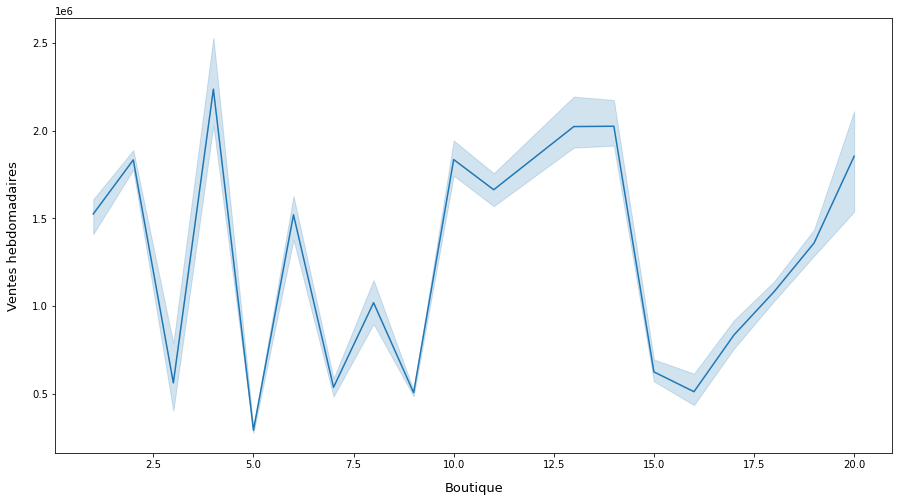

In [174]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df_viz, x="Store", y="Weekly_Sales")
plt.xlabel("Boutique",labelpad = 12, fontsize = 13)
plt.ylabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
plt.show()

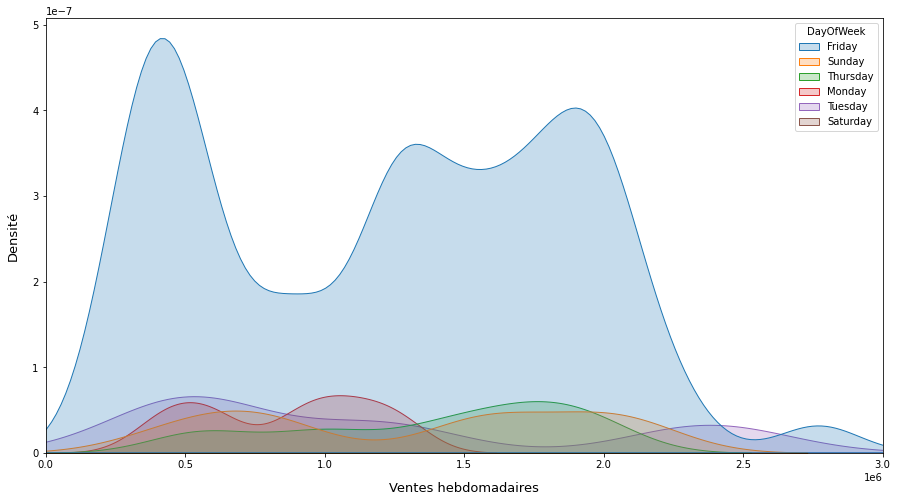

In [175]:
plt.figure(figsize=(15,8))
sns.kdeplot(x="Weekly_Sales", hue="DayOfWeek", data=df_viz, fill=True, bw_adjust=0.5)
plt.xlim(0, 3e6)
plt.xlabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
plt.ylabel("Densité",labelpad = 12, fontsize = 13)
plt.show()

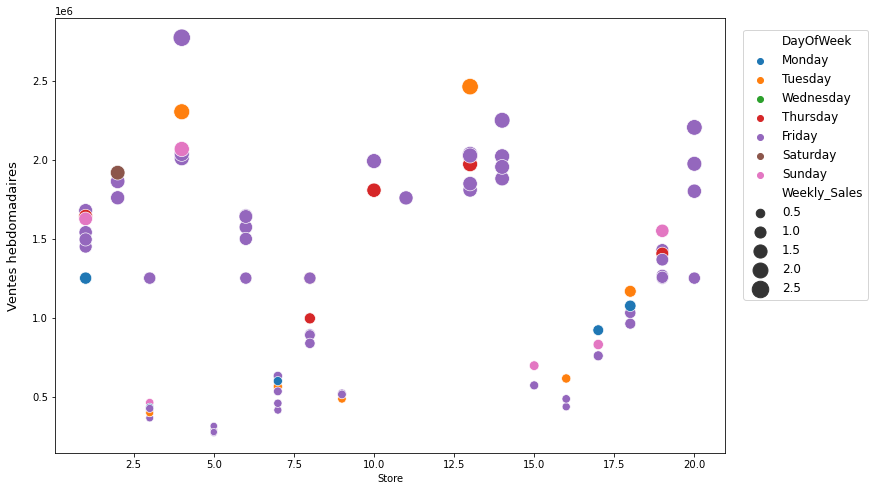

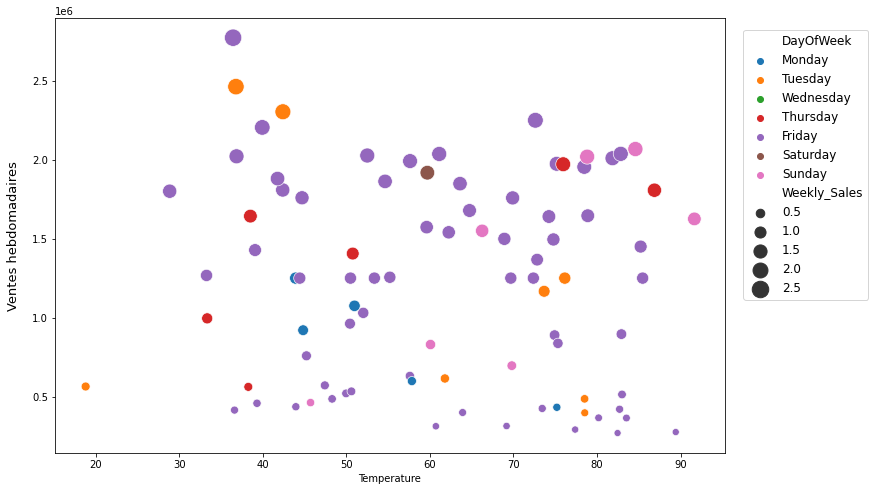

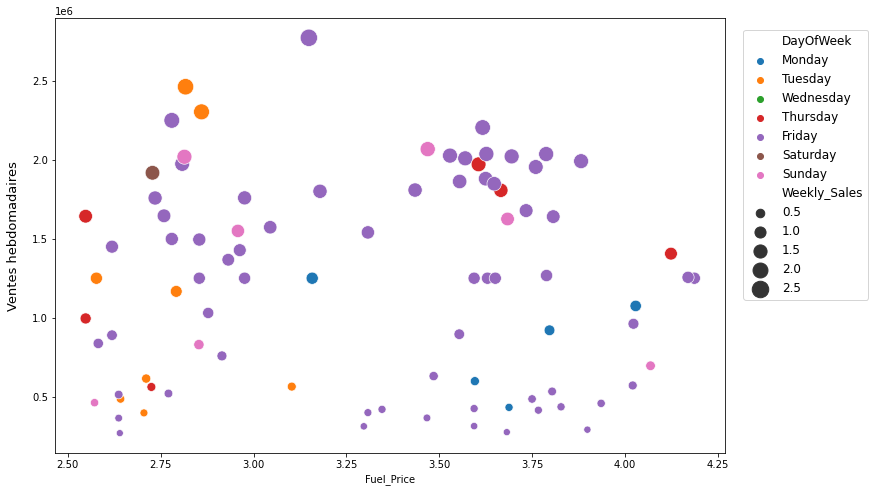

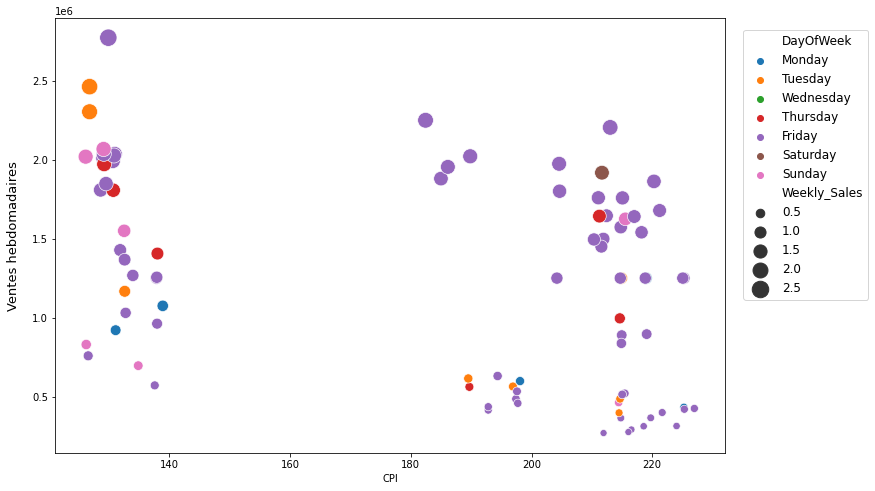

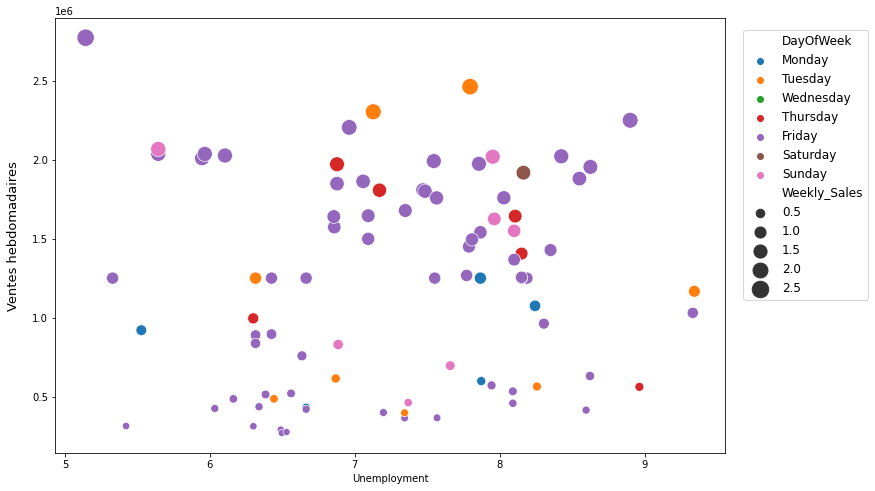

In [176]:
col = ["Store", 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i in df_viz[col]:
    plt.figure(figsize=(12,8))
    day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    sns.scatterplot(data=df_viz, x = df_viz[i], y = df_viz['Weekly_Sales'], hue="DayOfWeek", hue_order = day_order, 
                    size = "Weekly_Sales", sizes=(50, 300))
    plt.ylabel("Ventes hebdomadaires",labelpad = 12, fontsize = 13)
    plt.legend(bbox_to_anchor = (1.01,1), loc = 2, borderaxespad=1, fontsize= 12)

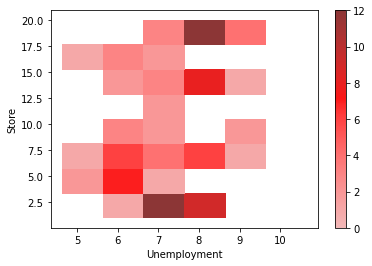

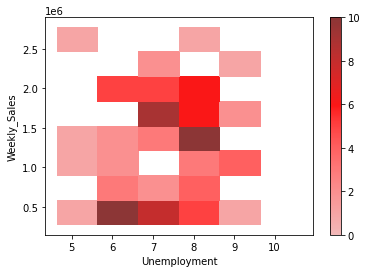

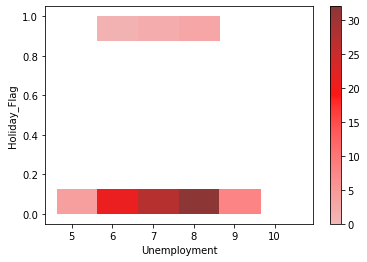

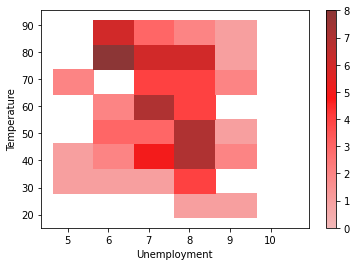

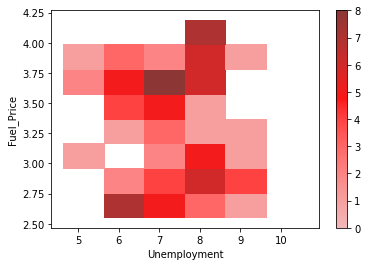

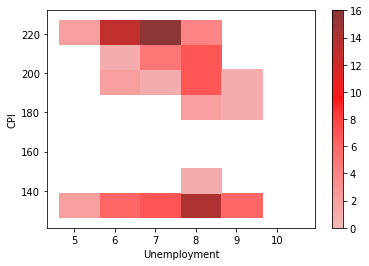

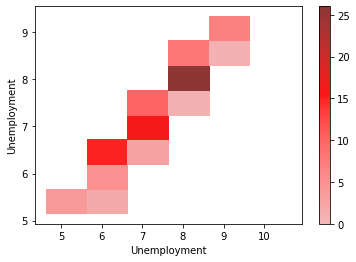

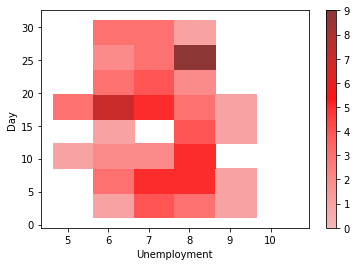

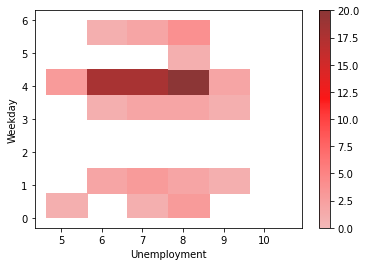

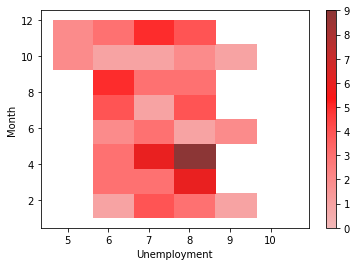

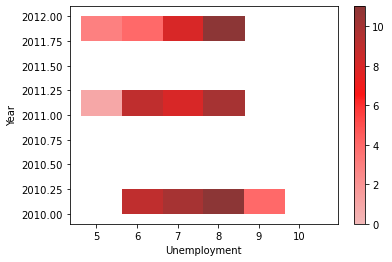

In [177]:
for col in df_viz.select_dtypes('float64'):
    plt.figure()
    sns.histplot(data=df_viz, x = 'Unemployment', y = df_viz[col], cbar=True, color = "red", discrete =(True, False))
    plt.show()

In [178]:
df_viz["Weekly_Sales"].dropna()

0      1.572118e+06
1      1.807545e+06
4      1.644471e+06
6      6.953962e+05
7      2.203523e+06
           ...     
140    1.249536e+06
143    3.969688e+05
144    4.245131e+05
145    2.248646e+06
149    1.255087e+06
Name: Weekly_Sales, Length: 98, dtype: float64

# Machine Learning

## Preprocessing

In [179]:
df1.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Month_name,Year
0,6.0,1572117.54,0.0,59.61,3.045,214.777523,6.858,4.0,2.0,February,2011.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,4.0,3.0,March,2011.0
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,4.0,5.0,May,2010.0


In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 149
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         98 non-null     float64
 1   Weekly_Sales  98 non-null     float64
 2   Holiday_Flag  98 non-null     float64
 3   Temperature   98 non-null     float64
 4   Fuel_Price    98 non-null     float64
 5   CPI           98 non-null     float64
 6   Unemployment  98 non-null     float64
 7   Weekday       88 non-null     float64
 8   Month         88 non-null     float64
 9   Month_name    88 non-null     object 
 10  Year          88 non-null     float64
dtypes: float64(10), object(1)
memory usage: 11.2+ KB


In [181]:
df1["Store"] = df1["Store"].astype('str')
df1["Holiday_Flag"] = df1["Holiday_Flag"].astype('str')

In [182]:
df1.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Month_name,Year
0,6.0,1572117.54,0.0,59.61,3.045,214.777523,6.858,4.0,2.0,February,2011.0


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer

In [184]:
df1.head(1)
# Separate target variable Y from features X
target_name = 'Weekly_Sales'
variable = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', "Weekday", "Month", "Year"]

print("Separating labels from features...")
X = df1.loc[:,variable]
y = df1.loc[:,target_name]
print("...Done.")

Separating labels from features...
...Done.


In [185]:
X.head(1)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year
0,6.0,0.0,59.61,3.045,214.777523,6.858,4.0,2.0,2011.0


In [186]:
y.head(1)

0    1572117.54
Name: Weekly_Sales, dtype: float64

In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 149
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         98 non-null     object 
 1   Holiday_Flag  98 non-null     object 
 2   Temperature   98 non-null     float64
 3   Fuel_Price    98 non-null     float64
 4   CPI           98 non-null     float64
 5   Unemployment  98 non-null     float64
 6   Weekday       88 non-null     float64
 7   Month         88 non-null     float64
 8   Year          88 non-null     float64
dtypes: float64(7), object(2)
memory usage: 9.7+ KB


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print("Train data shape of X = % s and y = % s : "%(X_train.shape, y_train.shape))
print("Test data shape of X = % s and y = % s : "%(X_test.shape, y_test.shape))

Train data shape of X = (78, 9) and y = (78,) : 
Test data shape of X = (20, 9) and y = (20,) : 


In [189]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekday', 'Month', 'Year']  at positions  [2, 3, 4, 5, 6, 7, 8]
Found categorical features  ['Store', 'Holiday_Flag']  at positions  [0, 1]


In [190]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
y_train = y_train.tolist()
y_test = y_test.tolist()
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [191]:
numeric_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [192]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
        ]
    )

In [193]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
#print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
#print(X_train[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.

Performing preprocessings on train set...
...Done.


## Linear Regression

In [194]:
# Train model by Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Train score of linear regression: {:.3f} \nTest score of linear regression: {:.3f}'.\
    format(lr.score(X_train, y_train),lr.score(X_test, y_test)))

Train score of linear regression: 0.934 
Test score of linear regression: 0.838


> Cross validation.

In [195]:
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)
print('The cross-validated accuracy score of linear regression is : {:.3f}'.format(scores_lr.mean()))
print('The standard deviation of linear regression is : {:.3f}'.format(scores_lr.std()))

The cross-validated accuracy score of linear regression is : 0.815
The standard deviation of linear regression is : 0.148


In [196]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [197]:
# Print R^2 scores
print('R2 score on training set of linear regression: {:.3f} \nR2 score on test set of linear regression: {:.3f}'.\
    format(r2_score(y_train, y_train_pred_lr),r2_score(y_test, y_test_pred_lr)))

R2 score on training set of linear regression: 0.934 
R2 score on test set of linear regression: 0.838


In [198]:
import sklearn.metrics as metrics

In [199]:
# Print Error scores
print('Mean Absolute Error on test set of linear regression: {:.3f} \nMean Squared Error on test set of linear regression: {:.3f} \nRoot Squared Error on test set of linear regression: {:.3f}'.\
    format(metrics.mean_absolute_error(y_test, y_test_pred_lr), metrics.mean_squared_error(y_test, y_test_pred_lr), 
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr))))

Mean Absolute Error on test set of linear regression: 154223.661 
Mean Squared Error on test set of linear regression: 52325032634.286 
Root Squared Error on test set of linear regression: 228746.656


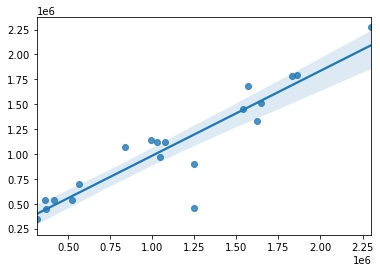

In [200]:
sns.regplot(y_test, y_test_pred_lr)
plt.show()

In [201]:
preprocessor.transformers_[1][1][1].get_feature_names_out()

array(['x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0',
       'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_2.0', 'x0_20.0', 'x0_3.0',
       'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0',
       'x1_1.0'], dtype=object)

In [202]:
preprocessed_features = numeric_features
cat_features_preprocessed = preprocessor.transformers_[1][1][1].get_feature_names_out()

preprocessed_features +=cat_features_preprocessed.tolist()
print(preprocessed_features)

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekday', 'Month', 'Year', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_2.0', 'x0_20.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x1_1.0']


In [203]:
lr.coef_

array([  -33193.28193251,   -65668.80164677,  -547055.99953273,
         -51816.85209729,    -8786.31645466,    16191.12201105,
          56329.86138776,  -827388.26543442,   295742.2630581 ,
        -690214.47571709,   208071.9845699 , -1854005.0068876 ,
       -1346307.65404172, -1946306.59160834, -1444245.46879337,
       -1183835.14947184,   320317.72088093,   263542.41300264,
        -935979.62957657,  -534206.100157  , -1192604.97245599,
          -3950.25081893, -1184777.06863563,  -503394.12772331,
       -1049988.84098125,   -41629.79437454])

In [204]:
all_features = pd.DataFrame()
all_features['features'] = preprocessed_features
all_features['importance'] = lr.coef_
all_features.head(5)

,features,importance
0,Temperature,-33193.281933
1,Fuel_Price,-65668.801647
2,CPI,-547055.999533
3,Unemployment,-51816.852097
4,Weekday,-8786.316455


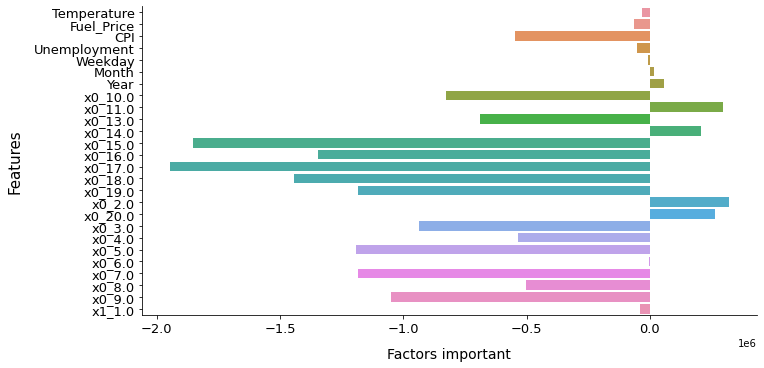

In [205]:
sns.catplot(y ='features', x='importance',data=all_features, kind="bar", aspect=1/0.5)
plt.xticks(fontsize = 13, rotation = 0)
plt.yticks(fontsize = 13, rotation = 0)
plt.xlabel("Factors important",labelpad = 12, fontsize = 14)
plt.ylabel("Features",labelpad = 12, fontsize = 15)
plt.show()

## Ridge

In [206]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
print('Train score of ridge: {:.3f} \nTest score of ridge: {:.3f}'.format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Train score of ridge: 0.890 
Test score of ridge: 0.719


In [207]:
scores_ridge = cross_val_score(ridge, X_train, y_train, cv=10)
print('The cross-validated accuracy score of ridge is : {:.3f}'.format(scores_ridge.mean()))
print('The standard deviation of ridge is : {:.3f}'.format(scores_ridge.std()))

The cross-validated accuracy score of ridge is : 0.739
The standard deviation of ridge is : 0.118


In [208]:
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

In [209]:
# Print R^2 scores
print('R2 score on training set of ridge: {:.3f} \nR2 score on test set of ridge: {:.3f}'.\
    format(r2_score(y_train, y_train_pred_ridge),r2_score(y_test, y_test_pred_ridge)))

R2 score on training set of ridge: 0.890 
R2 score on test set of ridge: 0.719


In [210]:
# Print Error scores
print('Mean Absolute Error on test set of ridge: {:.3f} \nMean Squared Error on test set of ridge: {:.3f} \nMean Squared Error on test set of ridge: {:.3f}'.\
    format(metrics.mean_absolute_error(y_test, y_test_pred_ridge), metrics.mean_squared_error(y_test, y_test_pred_ridge), 
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge))))


Mean Absolute Error on test set of ridge: 260719.325 
Mean Squared Error on test set of ridge: 90849734375.401 
Mean Squared Error on test set of ridge: 301412.897


> GridSearchCV

In [211]:
params = {'alpha': np.arange(0,10000,100)} # determine the range of parameters to try

grid_ridge = GridSearchCV(ridge, params, cv = 10, verbose = 1)
grid_fit_ridge = grid_ridge.fit(X_train, y_train)
print("Optimal value for alpha : ", grid_fit_ridge.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Optimal value for alpha :  {'alpha': 0}


In [212]:
print('Train score for the best model ridge: {:.3f} \nTest score for the best model ridge: {:.3f}'.\
    format(grid_fit_ridge.best_estimator_.score(X_train, y_train), grid_fit_ridge.best_estimator_.score(X_test, y_test)))

Train score for the best model ridge: 0.934 
Test score for the best model ridge: 0.838


> Cross validation after find out best paramters.

In [213]:
scores_ridge = cross_val_score(grid_fit_ridge.best_estimator_, X_train, y_train, cv=10)
print('The cross-validated accuracy score is of ridge: {:.3f}'.format(scores_ridge.mean()))
print('The standard deviation is of ridge: {:.3f}'.format(scores_ridge.std()))

The cross-validated accuracy score is of ridge: 0.815
The standard deviation is of ridge: 0.148


## Lasso

In [214]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
print('Train score of lasso: {:.3f} \nTest score of lasso: {:.3f}'.format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Train score of lasso: 0.890 
Test score of lasso: 0.719


In [215]:
scores_lasso = cross_val_score(lasso, X_train, y_train, cv=10)
print('The cross-validated accuracy score of lasso is : {:.3f}'.format(scores_lasso.mean()))
print('The standard deviation of lasso is : {:.3f}'.format(scores_lasso.std()))

The cross-validated accuracy score of lasso is : 0.820
The standard deviation of lasso is : 0.150


In [216]:
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

In [217]:
# Print R^2 scores
print('R2 score on training set of lasso: {:.3f} \nR2 score on test set of lasso: {:.3f}'.\
    format(r2_score(y_train, y_train_pred_lasso),r2_score(y_test, y_test_pred_lasso)))

R2 score on training set of lasso: 0.934 
R2 score on test set of lasso: 0.840


In [218]:
# Print Error scores
print('Mean Absolute Error on test set of lasso: {:.3f} \nMean Squared Error on test set of lasso: {:.3f} \nMean Squared Error on test set of lasso: {:.3f}'.\
    format(metrics.mean_absolute_error(y_test, y_test_pred_lasso), metrics.mean_squared_error(y_test, y_test_pred_lasso), 
    np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso))))

Mean Absolute Error on test set of lasso: 152499.327 
Mean Squared Error on test set of lasso: 51895872869.833 
Mean Squared Error on test set of lasso: 227806.657


> GridSearchCV

In [219]:
params = {'alpha': [10**(-a) for a in range(10)]} # determine the range of parameters to try

grid_lasso = GridSearchCV(lasso, params, cv = 10, verbose = 1)
grid_fit_lasso = grid_lasso.fit(X_train, y_train)
print("Optimal value for alpha : ", grid_fit_lasso.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Optimal value for alpha :  {'alpha': 1}


In [220]:
print('Train score for the best model lasso: {:.3f} \nTest score for the best model lasso: {:.3f}'.\
    format(grid_fit_lasso.best_estimator_.score(X_train, y_train), grid_fit_lasso.best_estimator_.score(X_test, y_test)))

Train score for the best model lasso: 0.934 
Test score for the best model lasso: 0.840


> Cross validation after find out best paramters.

In [221]:
scores_lasso = cross_val_score(grid_fit_lasso.best_estimator_, X_train, y_train, cv=10)
print('The cross-validated accuracy score of lasso is : {:.3f}'.format(scores_lasso.mean()))
print('The standard deviation of lasso is : {:.3f}'.format(scores_lasso.std()))

The cross-validated accuracy score of lasso is : 0.820
The standard deviation of lasso is : 0.150


# Conclusion

In [222]:
print('The cross-validated accuracy score of lr is : {:.3f}'.format(scores_lr.mean()))
print('The standard deviation of lr is : {:.3f}'.format(scores_lr.std()))
print()

print('The cross-validated accuracy score of Ridge is : {:.3f}'.format(scores_ridge.mean()))
print('The standard deviation of ridge is : {:.3f}'.format(scores_ridge.std()))
print()

print('The cross-validated accuracy of Lasso score is : {:.3f}'.format(scores_lasso.mean()))
print('The standard deviation of lasoo is : {:.3f}'.format(scores_lasso.std()))

The cross-validated accuracy score of lr is : 0.815
The standard deviation of lr is : 0.148

The cross-validated accuracy score of Ridge is : 0.815
The standard deviation of ridge is : 0.148

The cross-validated accuracy of Lasso score is : 0.820
The standard deviation of lasoo is : 0.150


In [223]:
models = []
lr = LinearRegression()
ridge = Ridge(alpha = 0)
lasso = Lasso(alpha = 1)

models.append(lr)
models.append(ridge)
models.append(lasso)

In [224]:
cv_results = []
for model in models:
    cv_results.append(cross_val_score(model, X_train, y_train, cv=10))

In [225]:
results = pd.DataFrame({"Algorithm": ["Linear Regression", "Ridge", "Lasso"],
             "Accuracy_mean": [cv_result.mean() for cv_result in cv_results],
             "Std": [cv_result.std() for cv_result in cv_results]})

results = results.sort_values(by="Accuracy_mean", ascending=False).style.background_gradient(cmap='Blues', subset=['Accuracy_mean'])
results

,Algorithm,Accuracy_mean,Std
2,Lasso,0.819686,0.150302
0,Linear Regression,0.814707,0.148383
1,Ridge,0.814707,0.148383


Le score des modèles Lasso s'améliore un peu par rapport à la régression linéaire.

Le score des modèles Ridge n'apporte aucune amélioration par rapport à la régression linéaire.